In [72]:
#Import Libraries
import tensorflow as tf
import pandas as pd
import keras.models
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [73]:
#Read csv file
df = pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

## EDA

In [5]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.shape

(517, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
df.duplicated().sum()

8

In [10]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [13]:
df = df.drop_duplicates()

In [14]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category


In [17]:
df.duplicated().sum()

0

In [18]:
df = df.drop(labels=['month','day'],axis = 1)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


## Encoding

In [19]:
import category_encoders as ce

In [20]:
Ordinal = ce.OrdinalEncoder(cols = ['size_category'])
Ordinal

OrdinalEncoder(cols=['size_category'])

In [21]:
df1 = Ordinal.fit_transform(df)

In [22]:
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


### Standardization

In [32]:
sc = StandardScaler()
standardized_df=sc.fit_transform(df1)
df1=pd.DataFrame(standardized_df, columns=df1.columns)

In [33]:
df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,-0.202791,2.265509,...,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413,-0.609892
1,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,-0.202791,-0.441402,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413,-0.609892
2,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,-0.202791,-0.441402,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413,-0.609892
3,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,-0.202791,2.265509,...,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413,-0.609892
4,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,-0.202791,-0.441402,...,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413,-0.609892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,-0.069035,-0.102277,-0.441402,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,1.639636
505,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,-0.069035,0.644559,-0.441402,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,1.639636
506,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,-0.069035,-0.028608,-0.441402,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,1.639636
507,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,-0.069035,-0.202791,-0.441402,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,-0.609892


### Feature Scaling

In [34]:
x = df1.iloc[:,:-1]

In [35]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,-0.202791,2.265509,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
1,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,-0.202791,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413
2,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,-0.202791,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413
3,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,-0.202791,2.265509,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
4,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,-0.202791,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,-0.069035,-0.102277,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413
505,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,-0.069035,0.644559,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413
506,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,-0.069035,-0.028608,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413
507,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,-0.069035,-0.202791,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413


In [36]:
y = df1['size_category']
y

0     -0.609892
1     -0.609892
2     -0.609892
3     -0.609892
4     -0.609892
         ...   
504    1.639636
505    1.639636
506    1.639636
507   -0.609892
508   -0.609892
Name: size_category, Length: 509, dtype: float64

### Splitting the data

In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

### Creating model

In [56]:
#Intialize ANN model(it will create i/p layer and also assign weights)

ann = Sequential()

#Add hidden layers
ann.add(Dense(units=30, activation='relu'))

#Add output layer
ann.add(Dense(units=1,activation='sigmoid'))

#Establish the connection between layers
ann.compile(optimizer='adam',loss='binary_crossentropy')

#Fit the data 
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50)

Epoch 1/50
13/13 [==============================] - 1s 26ms/step - loss: 0.4989 - val_loss: 0.4368
Epoch 2/50
13/13 [==============================] - 0s 7ms/step - loss: 0.4045 - val_loss: 0.3681
Epoch 3/50
13/13 [==============================] - 0s 8ms/step - loss: 0.3305 - val_loss: 0.3103
Epoch 4/50
13/13 [==============================] - 0s 7ms/step - loss: 0.2642 - val_loss: 0.2715
Epoch 5/50
13/13 [==============================] - 0s 7ms/step - loss: 0.2062 - val_loss: 0.2354
Epoch 6/50
13/13 [==============================] - 0s 7ms/step - loss: 0.1566 - val_loss: 0.2056
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 0.1074 - val_loss: 0.1828
Epoch 8/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0651 - val_loss: 0.1557
Epoch 9/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0227 - val_loss: 0.1377
Epoch 10/50
13/13 [==============================] - 0s 7ms/step - loss: -0.0173 - val_loss: 0.1161
Epoch 11/50
13/13

<AxesSubplot:>

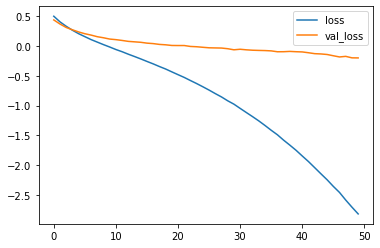

In [57]:
val_loss = pd.DataFrame(ann.history.history)

val_loss.plot()

### HyperParameter Tuning

In [61]:
#Early Stopping

early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [62]:
ann1 = Sequential()

ann1.add(Dense(units=30, activation='relu'))
ann1.add(Dense(units=1, activation='sigmoid'))
ann1.compile(optimizer='adam', loss = 'binary_crossentropy')

ann1.fit(xtrain,ytrain, validation_data=(xtest,ytest), callbacks=[early], epochs=50)

Epoch 1/50
13/13 [==============================] - 1s 26ms/step - loss: 0.9388 - val_loss: 0.8644
Epoch 2/50
13/13 [==============================] - 0s 7ms/step - loss: 0.7790 - val_loss: 0.7184
Epoch 3/50
13/13 [==============================] - 0s 7ms/step - loss: 0.6475 - val_loss: 0.5967
Epoch 4/50
13/13 [==============================] - 0s 7ms/step - loss: 0.5342 - val_loss: 0.4918
Epoch 5/50
13/13 [==============================] - 0s 7ms/step - loss: 0.4355 - val_loss: 0.4159
Epoch 6/50
13/13 [==============================] - 0s 7ms/step - loss: 0.3548 - val_loss: 0.3458
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 0.2792 - val_loss: 0.2932
Epoch 8/50
13/13 [==============================] - 0s 8ms/step - loss: 0.2141 - val_loss: 0.2465
Epoch 9/50
13/13 [==============================] - 0s 7ms/step - loss: 0.1561 - val_loss: 0.2074
Epoch 10/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0975 - val_loss: 0.1727
Epoch 11/50
13/13 

<AxesSubplot:>

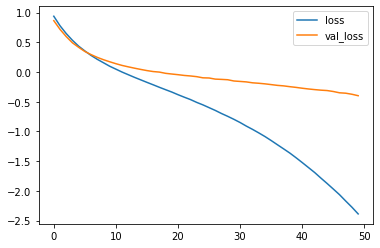

In [63]:
early_loss = pd.DataFrame(ann1.history.history)

early_loss.plot()

In [64]:
#Dropout Layer

ann2 = Sequential()

ann2.add(Dense(units=30, activation='relu'))
ann2.add(Dropout(rate=0.5))
ann2.add(Dense(units=1, activation='sigmoid'))
ann2.compile(optimizer='adam',loss='binary_crossentropy')
ann2.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs = 50)

Epoch 1/50
13/13 [==============================] - 1s 27ms/step - loss: 1.0119 - val_loss: 0.8752
Epoch 2/50
13/13 [==============================] - 0s 7ms/step - loss: 0.8812 - val_loss: 0.7847
Epoch 3/50
13/13 [==============================] - 0s 8ms/step - loss: 0.7473 - val_loss: 0.7036
Epoch 4/50
13/13 [==============================] - 0s 7ms/step - loss: 0.6433 - val_loss: 0.6321
Epoch 5/50
13/13 [==============================] - 0s 7ms/step - loss: 0.5519 - val_loss: 0.5685
Epoch 6/50
13/13 [==============================] - 0s 7ms/step - loss: 0.5644 - val_loss: 0.5210
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 0.4657 - val_loss: 0.4827
Epoch 8/50
13/13 [==============================] - 0s 7ms/step - loss: 0.4476 - val_loss: 0.4421
Epoch 9/50
13/13 [==============================] - 0s 7ms/step - loss: 0.3322 - val_loss: 0.4058
Epoch 10/50
13/13 [==============================] - 0s 8ms/step - loss: 0.2339 - val_loss: 0.3753
Epoch 11/50
13/13 

<AxesSubplot:>

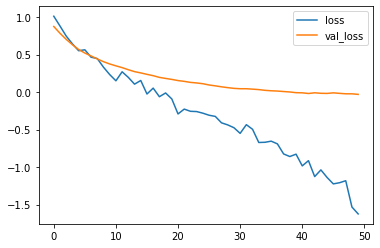

In [65]:
drop_loss = pd.DataFrame(ann2.history.history)
drop_loss.plot()

In [66]:
# Early Stoppage + Dropout layer

ann3 = Sequential()

ann3.add(Dense(units=30, activation='relu'))
ann3.add(Dropout(rate=0.5))

ann3.add(Dense(units=1, activation='sigmoid'))
ann3.compile(optimizer='adam',loss='binary_crossentropy')
ann3.fit(xtrain,ytrain, validation_data=(xtest,ytest),callbacks=[early], epochs = 50)


Epoch 1/50
13/13 [==============================] - 1s 25ms/step - loss: 0.8404 - val_loss: 0.7033
Epoch 2/50
13/13 [==============================] - 0s 8ms/step - loss: 0.7599 - val_loss: 0.6139
Epoch 3/50
13/13 [==============================] - 0s 8ms/step - loss: 0.6878 - val_loss: 0.5396
Epoch 4/50
13/13 [==============================] - 0s 7ms/step - loss: 0.6601 - val_loss: 0.4774
Epoch 5/50
13/13 [==============================] - 0s 7ms/step - loss: 0.5014 - val_loss: 0.4143
Epoch 6/50
13/13 [==============================] - 0s 7ms/step - loss: 0.4562 - val_loss: 0.3649
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 0.3431 - val_loss: 0.3166
Epoch 8/50
13/13 [==============================] - 0s 7ms/step - loss: 0.3403 - val_loss: 0.2769
Epoch 9/50
13/13 [==============================] - 0s 7ms/step - loss: 0.3392 - val_loss: 0.2385
Epoch 10/50
13/13 [==============================] - 0s 7ms/step - loss: 0.2933 - val_loss: 0.2027
Epoch 11/50
13/13 

<AxesSubplot:>

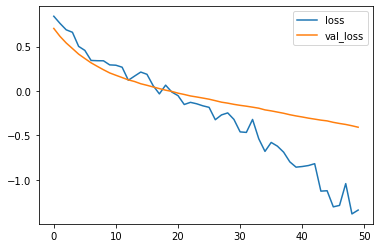

In [68]:
de_loss = pd.DataFrame(ann3.history.history)
de_loss.plot()

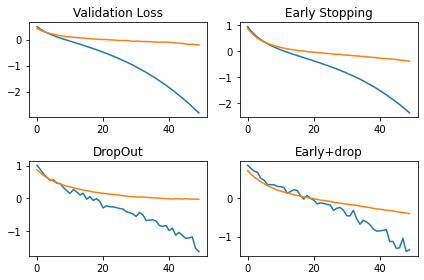

In [71]:
plt.subplot(2,2,1)
plt.plot(val_loss)
plt.title('Validation Loss')

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.title('Early Stopping')

plt.subplot(2,2,3)
plt.plot(drop_loss)
plt.title('DropOut')

plt.subplot(2,2,4)
plt.plot(de_loss)
plt.title('Early+drop')

plt.tight_layout()